# Stock Price Prediction Using RNNs

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [6]:
# Import libraries
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

#### **1.1.1** <font color =red> [5 marks] </font>
Create the function to join DataFrames and use it to combine the four datasets.

In [7]:
# Define a function to load data and aggregate them
def load_and_aggregate_data(file_names):
    """
    Load and aggregate stock data from multiple CSV files.

    Args:
        file_names (list): List of file paths for the stock data CSV files.

    Returns:
        pd.DataFrame: A combined DataFrame with data from all input files.
    """
    data_frames = []
    for file in file_names:
        # Extract stock name from the file name
        stock_name = file.split('_')[0]
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file)
        # Add a column for the stock name
        df['Stock'] = stock_name
        # Append the DataFrame to the list
        data_frames.append(df)
    
    # Concatenate all DataFrames into one
    combined_df = pd.concat(data_frames, ignore_index=True)
    return combined_df


In [8]:
# Specify the names of the raw data files to be read and use the aggregation function to read the files
file_names = ['IBM_stocks_data.csv', 'MSFT_stocks_data.csv', 'GOOGL_stocks_data.csv', 'AMZN_stocks_data.csv']
combined_data = load_and_aggregate_data(file_names)
combined_data.head()


,Date,Open,High,Low,Close,Volume,Name,Stock
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM,IBM


In [9]:
# View specifics of the data
combined_data.info()
combined_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12077 entries, 0 to 12076
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    12077 non-null  object 
 1   Open    12076 non-null  float64
 2   High    12077 non-null  float64
 3   Low     12076 non-null  float64
 4   Close   12077 non-null  float64
 5   Volume  12077 non-null  int64  
 6   Name    12077 non-null  object 
 7   Stock   12077 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 754.9+ KB


,Open,High,Low,Close,Volume
count,12076.000000,12077.000000,12076.000000,12077.000000,1.207700e+04
mean,227.387118,229.422254,225.203189,227.380960,1.671763e+07
std,236.938260,238.568485,234.981015,236.851101,2.570572e+07
min,15.200000,15.620000,14.870000,15.150000,2.542560e+05
25%,54.930000,55.660000,54.425000,55.210000,3.124704e+06
50%,158.795000,160.410000,157.355000,158.880000,5.445269e+06
75%,281.405000,284.500000,278.610000,281.510000,1.802087e+07
max,1204.880000,1213.410000,1191.150000,1195.830000,5.910786e+08


#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

In [10]:
# Handle Missing Values
combined_data.isnull().sum()  # Check for missing values
combined_data.dropna(inplace=True)  # Drop rows with missing values

### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

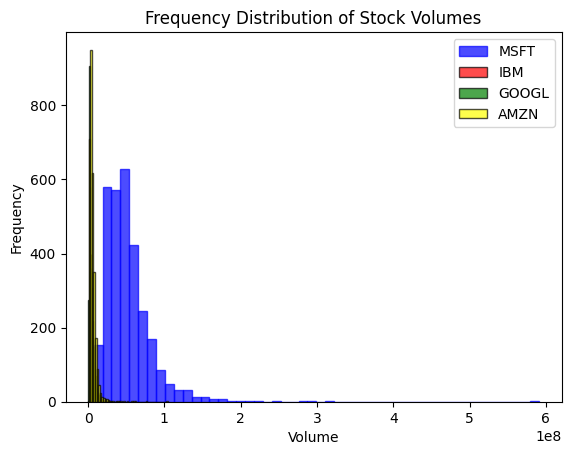

In [12]:
# Frequency distribution of volumes

# Plot MSFT data
msft_data = combined_data[combined_data['Stock'] == 'MSFT']
msft_data['Volume'].plot(kind='hist', bins=50, edgecolor='blue', color='blue', alpha=0.7, label='MSFT')

# Plot IBM data
ibm_data = combined_data[combined_data['Stock'] == 'IBM']
ibm_data['Volume'].plot(kind='hist', bins=50, edgecolor='black', color='red', alpha=0.7, label='IBM')

# Plot GOOGL data
googl_data = combined_data[combined_data['Stock'] == 'GOOGL']
googl_data['Volume'].plot(kind='hist', bins=50, edgecolor='black', color='green', alpha=0.7, label='GOOGL')

# Plot AMZN data
amzn_data = combined_data[combined_data['Stock'] == 'AMZN']
amzn_data['Volume'].plot(kind='hist', bins=50, edgecolor='black', color='yellow', alpha=0.7, label='AMZN')

# Add legend and title for better visibility
plt.legend()
plt.title('Frequency Distribution of Stock Volumes')
plt.xlabel('Volume')
plt.ylabel('Frequency')

# Show the plot
plt.show()


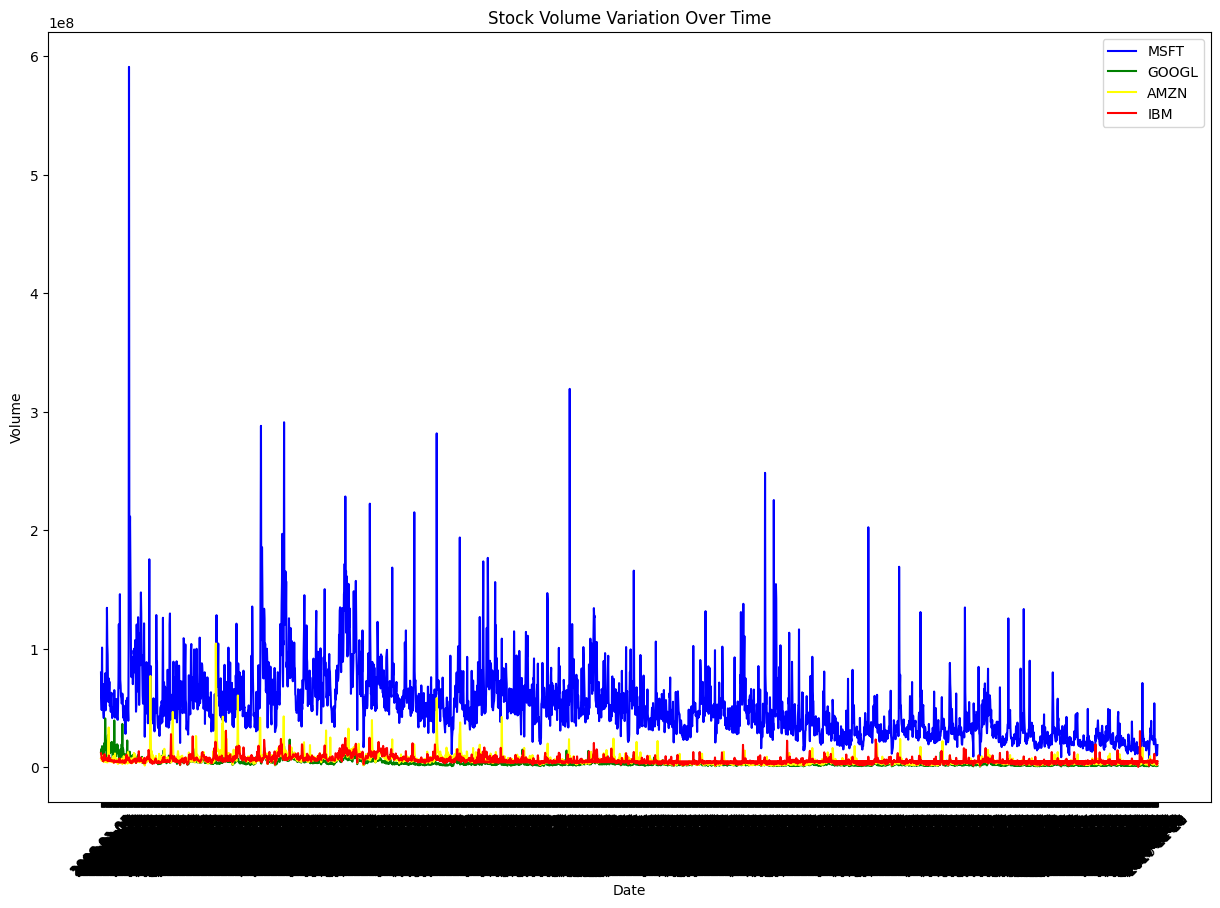

In [14]:
# Stock volume variation over time

plt.figure(figsize=(15, 10))

# Plot MSFT data
plt.plot(msft_data['Date'], msft_data['Volume'], label='MSFT', color='blue')

# Plot GOOGL data
plt.plot(googl_data['Date'], googl_data['Volume'], label='GOOGL', color='green')

# Plot AMZN data
plt.plot(amzn_data['Date'], amzn_data['Volume'], label='AMZN', color='yellow')

# Plot IBM data
plt.plot(ibm_data['Date'], ibm_data['Volume'], label='IBM', color='red')

# Add legend, title, and labels
plt.legend()
plt.title('Stock Volume Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


It seems that the volume of MSFT stock traded is generally higher than ones from IBM, GOOGL and AMZN.
The 3 companies stock are often traded at lower volume

#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

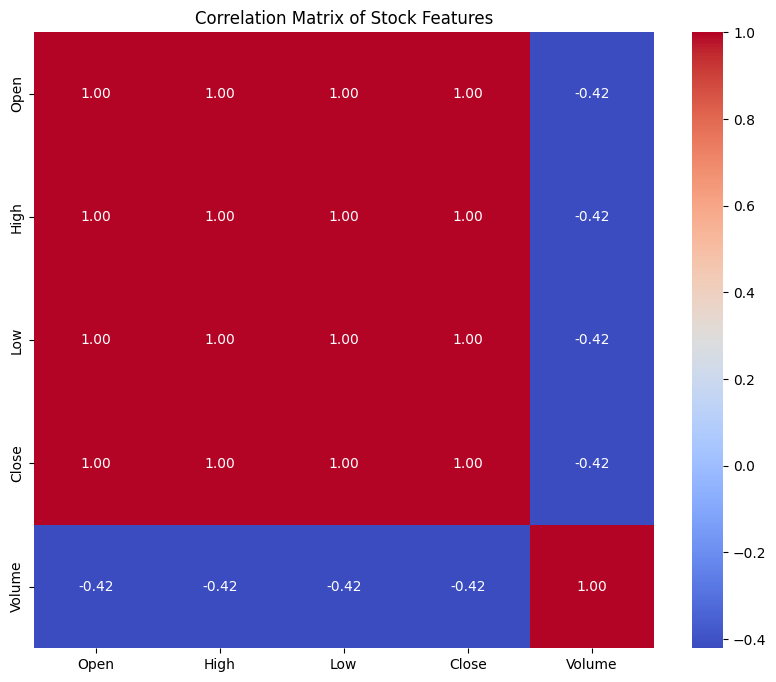

In [15]:
# Analyse correlations
data_without_date_and_name = combined_data.drop(columns=['Date'] + ['Stock'] + ['Name'])

# Compute the correlation matrix
correlation_matrix = data_without_date_and_name.corr()

# Plot the correlation matrix using a heatmap


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Features')
plt.show()


### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

**Hint:** If we use a window of size 3, in the first window, the rows `[0, 1, 2]` will be present and will be used to predict the value of `CloseAMZN` in row `3`. In the second window, rows `[1, 2, 3]` will be used to predict `CloseAMZN` in row `4`.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

In [16]:
# Rename the 'Close' column to include the stock name
combined_data['CloseAMZN'] = combined_data.loc[combined_data['Stock'] == 'AMZN', 'Close']
combined_data['CloseGOOGL'] = combined_data.loc[combined_data['Stock'] == 'GOOGL', 'Close']
combined_data['CloseIBM'] = combined_data.loc[combined_data['Stock'] == 'IBM', 'Close']
combined_data['CloseMSFT'] = combined_data.loc[combined_data['Stock'] == 'MSFT', 'Close']

# Fill NaN values with 0 to avoid issues during windowing
combined_data.fillna(0, inplace=True)

# Define a function that divides the data into windows and generates target variable values for each window
def create_windowed_data(data, window_size, step_size, target_names):
    """
    Create windowed input (X) and output (y) data from the main DataFrame.

    Args:
        data (pd.DataFrame): The main DataFrame containing stock data.
        window_size (int): The size of the window for input features.
        step_size (int): The stride length for moving the window.
        target_names (list): List of stock names whose closing values to predict.

    Returns:
        X (np.ndarray): Windowed input features.
        y (np.ndarray): Corresponding target values.
    """
    X, y = [], []
    
    # Iterate over the DataFrame to create windows
    for start in range(0, len(data) - window_size, step_size):
        end = start + window_size
        
        # Create the input window
        window = data.iloc[start:end]
        X.append(window.values)  # Append the windowed data as an array
        
        # Get the target values for the next time step
        # Filter the data for the target stocks and get the 'Close' values
        if end < len(data):
            target_values = data.iloc[end][target_names].values
            y.append(target_values)

    return np.array(X), np.array(y)

# Example usage:
# Assuming 'combined_data' is your main DataFrame and you want to predict 'Close' prices for 'AMZN' and 'GOOGL'
window_size = 3
step_size = 1
target_names = ['CloseAMZN', 'CloseGOOGL','CloseIBM','CloseMSFT']
# Create windowed data

X, y = create_windowed_data(combined_data, window_size, step_size, target_names)


In [17]:
# Display the first few rows of the numpy array X
import pandas as pd

# Convert the first few rows of X to a DataFrame for better readability
pd.DataFrame(X[0:5].reshape(-1, X.shape[2]), columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name', 'Stock', 'CloseAMZN', 'CloseGOOGL', 'CloseIBM', 'CloseMSFT'])

,Date,Open,High,Low,Close,Volume,Name,Stock,CloseAMZN,CloseGOOGL,CloseIBM,CloseMSFT
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM,IBM,0.0,0.0,82.06,0.0
1,2006-01-04,82.2,82.5,81.33,81.95,9840600,IBM,IBM,0.0,0.0,81.95,0.0
2,2006-01-05,81.4,82.9,81.0,82.5,7213500,IBM,IBM,0.0,0.0,82.5,0.0
3,2006-01-04,82.2,82.5,81.33,81.95,9840600,IBM,IBM,0.0,0.0,81.95,0.0
4,2006-01-05,81.4,82.9,81.0,82.5,7213500,IBM,IBM,0.0,0.0,82.5,0.0
5,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM,IBM,0.0,0.0,84.95,0.0
6,2006-01-05,81.4,82.9,81.0,82.5,7213500,IBM,IBM,0.0,0.0,82.5,0.0
7,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM,IBM,0.0,0.0,84.95,0.0
8,2006-01-09,84.1,84.25,83.38,83.73,6858200,IBM,IBM,0.0,0.0,83.73,0.0
9,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM,IBM,0.0,0.0,84.95,0.0


In [18]:
# Convert y to a pandas DataFrame to use the head() method
import pandas as pd
y_df = pd.DataFrame(y)
y_df.head()

,0,1,2,3
0,0.0,0.0,84.95,0.0
1,0.0,0.0,83.73,0.0
2,0.0,0.0,84.07,0.0
3,0.0,0.0,84.17,0.0
4,0.0,0.0,83.57,0.0


#### **1.3.2** <font color =red> [3 marks] </font>
Create a function to scale the data.

Define a function that will scale the data.

For scaling, we have to look at the whole length of data to find max/min values or standard deviations and means. If we scale the whole data at once, this will lead to data leakage in the windows. This is not necessarily a problem if the model is trained on the complete data with cross-validation.

One way to scale when dealing with windowed data is to use the `partial_fit()` method.
```
scaler.partial_fit(window)
scaler.transform(window)
```
You may use any other suitable way to scale the data properly. Arrive at a reasonable way to scale your data.

In [19]:
# Define a function that scales the windowed data
# The function takes in the windowed data sets and returns the scaled windows

from sklearn.preprocessing import MinMaxScaler

def scale_windowed_data(X):
    """
    Scales the windowed data using MinMaxScaler with partial_fit to avoid data leakage.

    Args:
        X_train (np.ndarray): The training data.
        X_test (np.ndarray): The testing data.

    Returns:
        tuple: Scaled training and testing data.
    """
    scaler = MinMaxScaler()

    # Reshape the training and testing data to fit the scaler
    X_shape = X.shape

    X_flat = X.reshape(-1, X_shape[-1])

    # Use partial_fit on the flattened training data
    scaler.partial_fit(X_flat)

    # Transform the training and testing data
    X_scaled_flat = scaler.transform(X_flat)

    # Reshape the scaled data back to the original shape
    X_scaled = X_scaled_flat.reshape(X_shape)

    return X_scaled


In [20]:
# Remove non-numeric columns (e.g., 'Date', 'Name', 'Stock') from the data before scaling
# Assuming the numeric columns are at specific positions
X_numeric = X[:, :, [1, 2, 3, 4, 5]].astype(float)  # Select only numeric columns (e.g., 'Open', 'High', 'Low', 'Close', 'Volume')

# Scale the numeric data
X_scaled = scale_windowed_data(X_numeric)

In [21]:
X_scaled[:2]

array([[[0.05652781, 0.05587791, 0.05605808, 0.05667073, 0.01939823],
        [0.05631767, 0.05583616, 0.05650015, 0.05657757, 0.01622537],
        [0.05564522, 0.05617011, 0.05621961, 0.0570434 , 0.01177887]],

       [[0.05631767, 0.05583616, 0.05650015, 0.05657757, 0.01622537],
        [0.05564522, 0.05617011, 0.05621961, 0.0570434 , 0.01177887],
        [0.05778865, 0.05794839, 0.05826844, 0.05911847, 0.01344417]]])

Next, define the main function that will call the windowing and scaling helper functions.

The input parameters for this function are:
- The joined master data set
- The names of the stocks that we wish to predict the *Close* prices for
- The window size
- The window stride
- The train-test split ratio

The outputs from this function are the scaled dataframes:
- *X_train*
- *y_train*
- *X_test*
- *y_test*

#### **1.3.3** <font color =red> [3 marks] </font>
Define a function to create windows of `window_size` and split the windowed data in to training and validation sets.

The function can take arguments such as list of target names, window size, window stride and split ratio. Use the windowing function here to make windows in the data and then perform scaling and train-test split.

In [22]:
# Define a function to create input and output data points from the master DataFrame
# Define a function to create input and output data points from the master DataFrame
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def create_and_split_data(data, target_names, window_size, step_size, split_ratio):

    # 1. Create windowed data
    X, y = create_windowed_data(data, window_size, step_size, target_names)

    # 2. Scale the data
    # Identify numeric columns for scaling
    X_numeric = X[:, :, [1, 2, 3, 4, 5]].astype(float)  

    # Scale the numeric data
    X_scaled = scale_windowed_data(X_numeric)

    # 3. Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=split_ratio, shuffle=False)

    return X_train, X_test, y_train, y_test




We can now use these helper functions to create our training and testing data sets. But first we need to decide on a length of windows. As we are doing time series prediction, we want to pick a sequence that shows some repetition of patterns.

For selecting a good sequence length, some business understanding will help us. In financial scenarios, we can either work with business days, weeks (which comprise of 5 working days), months, or quarters (comprising of 13 business weeks). Try looking for some patterns for these periods.

#### **1.3.4** <font color =red> [2 marks] </font>
Identify an appropriate window size.

For this, you can use plots to see how target variable is varying with time. Try dividing it into parts by weeks/months/quarters.

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9304\227891738.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_monthly = y_df.resample('M').mean()
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9304\227891738.py:18: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  y_quarterly = y_df.resample('Q').mean()


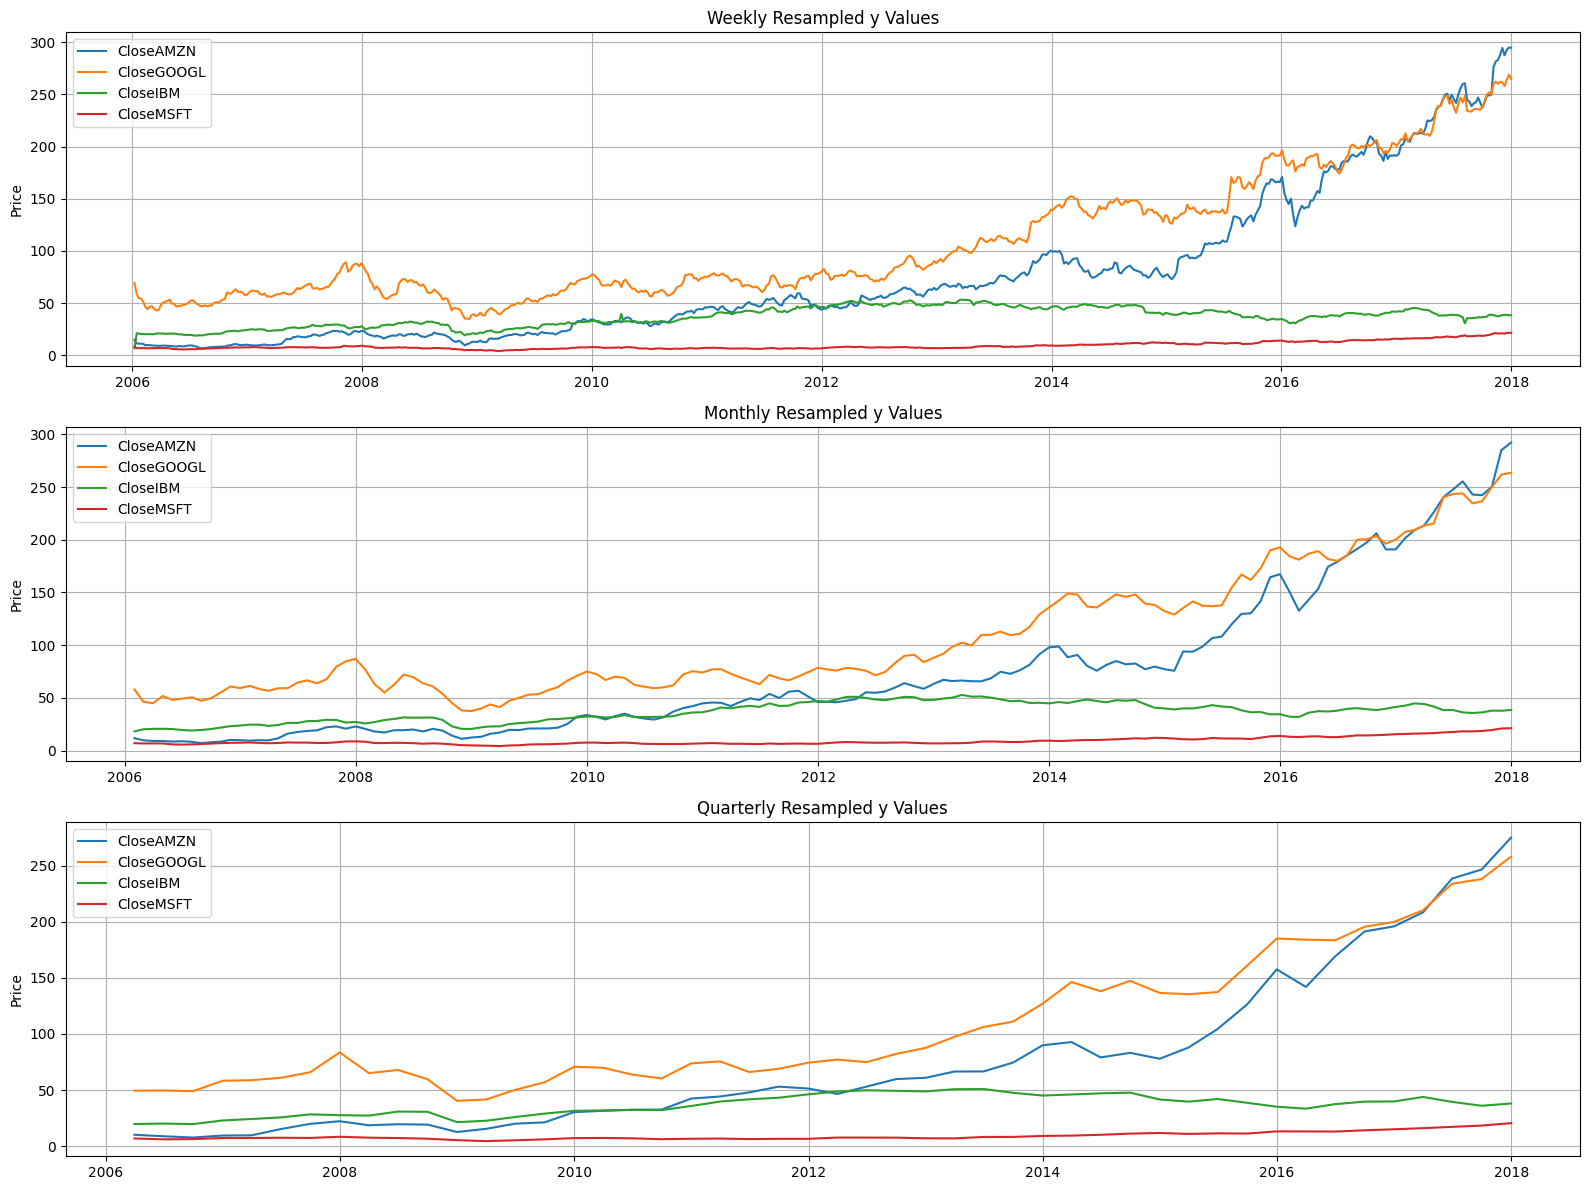

In [23]:
# Checking for patterns in different sequence lengths
# Convert y to a DataFrame for easier manipulation
y_df = pd.DataFrame(y, columns=target_names)

# Create a DatetimeIndex from the 'Date' column of combined_data
date_index = pd.to_datetime(combined_data['Date'].iloc[window_size:])  # Offset by window_size

# Assign the DatetimeIndex to y_df
y_df.index = date_index

# Resample weekly
y_weekly = y_df.resample('W').mean()

# Resample monthly
y_monthly = y_df.resample('M').mean()

# Resample quarterly
y_quarterly = y_df.resample('Q').mean()

# Plotting
plt.figure(figsize=(16, 12))

# Weekly plot
plt.subplot(3, 1, 1)
for column in y_weekly.columns:
    plt.plot(y_weekly.index, y_weekly[column], label=column)
plt.title('Weekly Resampled y Values')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Monthly plot
plt.subplot(3, 1, 2)
for column in y_monthly.columns:
    plt.plot(y_monthly.index, y_monthly[column], label=column)
plt.title('Monthly Resampled y Values')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Quarterly plot
plt.subplot(3, 1, 3)
for column in y_quarterly.columns:
    plt.plot(y_quarterly.index, y_quarterly[column], label=column)
plt.title('Quarterly Resampled y Values')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

Quarter seems to be a good window size. Decide the window size is window size = 80 and window stride = 5

#### **1.3.5** <font color =red> [2 marks] </font>
Call the functions to create testing and training instances of predictor and target features.

In [24]:
# Create data instances from the master data frame using decided window size and window stride
# Create data instances from the master data frame using decided window size and window stride
window_size = 80
step_size = 5
split_ratio = 0.8  
target_names = ['CloseAMZN', 'CloseGOOGL', 'CloseIBM', 'CloseMSFT']

X_train, X_test, y_train, y_test = create_and_split_data(combined_data, target_names, window_size, step_size, split_ratio)


In [25]:
# Check the number of data points generated
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1920, 80, 5)
y_train shape: (1920, 4)
X_test shape: (480, 80, 5)
y_test shape: (480, 4)


**Check if the training and testing datasets are in the proper format to feed into neural networks.**

In [26]:
# Check if the datasets are compatible inputs to neural networks
X_train[:1]



array([[[0.05652781, 0.05587791, 0.05605808, 0.05667073, 0.01939823],
        [0.05631767, 0.05583616, 0.05650015, 0.05657757, 0.01622537],
        [0.05564522, 0.05617011, 0.05621961, 0.0570434 , 0.01177887],
        [0.05778865, 0.05794839, 0.05826844, 0.05911847, 0.01344417],
        [0.05791473, 0.05729719, 0.05824294, 0.05808517, 0.01117751],
        [0.0571162 , 0.05718866, 0.0580219 , 0.05837314, 0.00921889],
        [0.05814169, 0.05776472, 0.05825994, 0.05845784, 0.00934668],
        [0.05767938, 0.05705508, 0.05825994, 0.05794966, 0.00790801],
        [0.05699011, 0.05662929, 0.05749481, 0.05761087, 0.01128499],
        [0.056822  , 0.05638718, 0.05752882, 0.05746688, 0.01439928],
        [0.05783068, 0.05767288, 0.05836195, 0.05870346, 0.01824323],
        [0.05794836, 0.05741407, 0.05793689, 0.05754311, 0.01054416],
        [0.05702374, 0.05629534, 0.05643214, 0.05607785, 0.01415014],
        [0.05558638, 0.05535194, 0.0561516 , 0.0561202 , 0.00991808],
        [0.05563681,

In [27]:
# Change y_train format to float64
y_train = y_train.astype('float64')

# Verify the change
print("y_train dtype:", y_train.dtype)
print("X_train shape:", X_train.shape)
print("X_train dtype:", X_train.dtype)
print("y_train shape:", y_train.shape)
print("y_train dtype:", y_train.dtype)

y_train dtype: float64
X_train shape: (1920, 80, 5)
X_train dtype: float64
y_train shape: (1920, 4)
y_train dtype: float64


## **2 RNN Models** <font color =red> [20 marks] </font>

In this section, we will:
- Define a function that creates a simple RNN
- Tune the RNN for different hyperparameter values
- View the performance of the optimal model on the test data

### **2.1 Simple RNN Model** <font color =red> [10 marks] </font>

#### **2.1.1** <font color =red> [3 marks] </font>
Create a function that builds a simple RNN model based on the layer configuration provided.

In [ ]:
# Define a simple RNN model
# Ensure TensorFlow is installed

# Install TensorFlow if not already installed

# Import TensorFlow modules
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Create the RNN model
def create_simple_rnn(input_shape, output_units):
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', input_shape=input_shape))
    model.add(Dense(output_units))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Define input shape and output units
input_shape = (X_train.shape[1], X_train.shape[2])
output_units = y_train.shape[1]

# Create the model
model = create_simple_rnn(input_shape, output_units)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

### **2.1.4** <font color =red> [5 marks] </font>
Build a simple RNN model using PyTorch to predict the closing prices for the 4 companies.

In [ ]:
# Import necessary libraries for PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Define the RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Use the last time step
        return out

In [ ]:
# Set hyperparameters
input_size = X_train.shape[2]
hidden_size = 50
output_size = y_train.shape[1]
num_epochs = 20
batch_size = 32
learning_rate = 0.001

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Initialize the model, loss function, and optimizer
model = SimpleRNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

In [ ]:
# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test_tensor.numpy()[:, 0], label='Actual AMZN')
plt.plot(predictions.numpy()[:, 0], label='Predicted AMZN')
plt.legend()
plt.title('Actual vs Predicted Closing Prices for AMZN')
plt.show()

#### **2.1.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [ ]:
# Find an optimal configuration of simple RNN



In [ ]:
# Find the best configuration based on evaluation metrics



#### **2.1.3** <font color =red> [3 marks] </font>
Run for optimal Simple RNN Model and show final results.

In [ ]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model



Plotting the actual vs predicted values

In [ ]:
# Predict on the test data and plot



It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

In [ ]:
# Compute the performance of the model on the testing data set



### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

#### **2.2.1** <font color =red> [3 marks] </font>
Create a function that builds an advanced RNN model with tunable hyperparameters.

In [ ]:
# # Define a function to create a model and specify default values for hyperparameters



#### **2.2.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [ ]:
# Find an optimal configuration



#### **2.2.3** <font color =red> [3 marks] </font>
Run for optimal RNN Model and show final results.

In [ ]:
# Create the model with a combination of potentially optimal hyperparameter values and retrain the model



In [ ]:
# Compute the performance of the model on the testing data set


Plotting the actual vs predicted values

In [ ]:
# Predict on the test data


## **3 Predicting Multiple Target Variables** <font color =red> [OPTIONAL] </font>

In this section, we will use recurrent neural networks to predict stock prices for more than one company.

### **3.1 Data Preparation**

#### **3.1.1**
Create testing and training instances for multiple target features.

You can take the closing price of all four companies to predict here.

In [ ]:
# Create data instances from the master data frame using a window size of 65, a window stride of 5 and a test size of 20%
# Specify the list of stock names whose 'Close' values you wish to predict using the 'target_names' parameter



In [ ]:
# Check the number of data points generated



### **3.2 Run RNN Models**

#### **3.2.1**
Perform hyperparameter tuning to find the optimal network configuration for Simple RNN model.

In [ ]:
# Find an optimal configuration of simple RNN



In [ ]:
# Find the best configuration



In [ ]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the



In [ ]:
# Compute the performance of the model on the testing data set



In [ ]:
# Plotting the actual vs predicted values for all targets



#### **3.2.2**
Perform hyperparameter tuning to find the optimal network configuration for Advanced RNN model.

In [ ]:
# Find an optimal configuration of advanced RNN



In [ ]:
# Find the best configuration



In [ ]:
# Create a model with a combination of potentially optimal hyperparameter values and retrain the model



In [ ]:
# Compute the performance of the model on the testing data set



In [ ]:
# Plotting the actual vs predicted values for all targets



## **4 Conclusion** <font color =red> [5 marks] </font>

### **4.1 Conclusion and insights** <font color =red> [5 marks] </font>

#### **4.1.1** <font color =red> [5 marks] </font>
Conclude with the insights drawn and final outcomes and results.